# Phase-2 Normal Task

# Email Spam Detection

## Problem Statement

### The goal of this project is to develop a robust email spam detection system using machine learning techniques. By analyzing the content and characteristics of emails, the system should be able to accurately classify incoming emails as either spam or legitimate (ham).

# Lets Start

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [120]:
raw_data = pd.read_csv('C:/Users/Admin/Desktop/CVIP EDA PRoj/spam.csv', encoding='latin1')

In [121]:
raw_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [122]:
mail_data = raw_data.where((pd.notnull(raw_data)),'')

In [123]:
mail_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [124]:
mail_data.shape

(5572, 5)

In [125]:
mail_data.loc[mail_data['v1'] == 'spam', 'v1',] = 0
mail_data.loc[mail_data['v1'] == 'ham', 'v1',] = 1

In [126]:
X = mail_data['v2']

Y = mail_data['v1']

In [127]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [128]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object


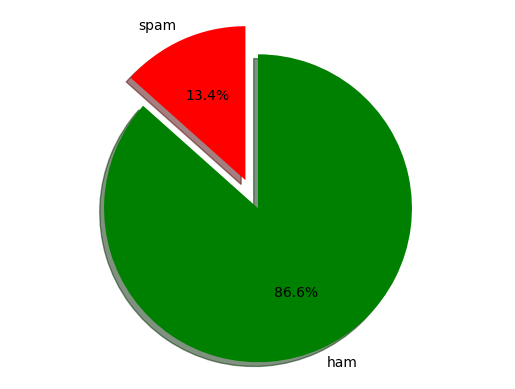

In [129]:
count_Class = pd.value_counts(mail_data['v1'], sort = True)

# Data to Plot
labels = 'spam', 'ham'
sizes = [count_Class[0], count_Class[1]]
colors = ['red', 'green']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()
     

### Splitting the data into test and train sets

In [130]:
X_train, X_test, y_train, y_test = tts(mail_data['v2'], mail_data['v1'], test_size=0.2, random_state=1)


### Vectorizing the data

In [131]:
count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

### Predicting and finding accuracy of the data

In [132]:
Mnb = MultinomialNB()
Mnb.fit(train_data, y_train.astype('int'))

MultinomialNB()

In [133]:
MnbPredicts = Mnb.predict(test_data)

In [134]:
print("The accuracy of multinomial model is {} %".format(accuracy_score(y_test.astype('int'), MnbPredicts) * 100))

The accuracy of multinomial model is 98.47533632286995 %


## Testing data with new Email message

### If the output message is '1' then the message is not spam, if the output message is '0' then the message is a spam

In [159]:
new_test_ham = ["Hi, I'm Divyateja and I am glad to share the program that I've written with everyone."]

In [160]:
new_test_spam= ["Congratulations, you've won a Voucher."]

In [161]:
new_test_ham_vectorized = count_vector.transform(new_test_ham)

In [162]:
new_test_spam_vectorized = count_vector.transform(new_test_spam)

In [163]:
sample_predict = Mnb.predict(new_test_ham_vectorized)
sample_predict
     

array([1])

In [165]:
sample_predict = Mnb.predict(new_test_spam_vectorized)
sample_predict

array([0])